In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder



In [24]:
df = pd.read_csv('cleaned_data.csv')

In [25]:
df.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [26]:
df.dtypes

customerID           object
tenure                int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [27]:
df.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,CUST_ID001,42,Month-to-month,Yes,Electronic check,79.854580,42.0,Yes,Male,0,...,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,CUST_ID002,32,Month-to-month,Yes,Electronic check,76.845120,32.0,No,Female,0,...,Yes,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,CUST_ID003,0,Month-to-month,No,Electronic check,55.614150,0.0,No,Female,0,...,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,CUST_ID004,72,Two year,Yes,Credit card (automatic),108.491165,72.0,No,Female,1,...,No,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,CUST_ID005,38,Month-to-month,Yes,Bank transfer (automatic),65.049760,38.0,No,Male,1,...,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [28]:
df.isnull().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [29]:
# Code Generated by Sidekick is for learning and experimentation purposes only.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print("=== CHURN CLASS BALANCE ANALYSIS ===\n")

# 1. Absolute counts
print("1. Absolute Counts:")
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# 2. Percentage distribution
print("\n2. Percentage Distribution:")
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentages.round(2))

# 3. Calculate imbalance ratio
print("\n3. Class Imbalance Metrics:")
total_samples = len(df)
majority_class = churn_counts.max()
minority_class = churn_counts.min()
imbalance_ratio = majority_class / minority_class

print(f"Total samples: {total_samples}")
print(f"Majority class count: {majority_class}")
print(f"Minority class count: {minority_class}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

# 4. Balance assessment
if imbalance_ratio <= 1.5:
    balance_status = "BALANCED"
elif imbalance_ratio <= 3:
    balance_status = "SLIGHTLY IMBALANCED"
elif imbalance_ratio <= 10:
    balance_status = "MODERATELY IMBALANCED"
else:
    balance_status = "HIGHLY IMBALANCED"

print(f"Dataset Status: {balance_status}")


=== CHURN CLASS BALANCE ANALYSIS ===

1. Absolute Counts:
Churn
No     28448
Yes     5761
Name: count, dtype: int64

2. Percentage Distribution:
Churn
No     83.16
Yes    16.84
Name: proportion, dtype: float64

3. Class Imbalance Metrics:
Total samples: 34209
Majority class count: 28448
Minority class count: 5761
Imbalance ratio: 4.94:1
Dataset Status: MODERATELY IMBALANCED


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataframe
df_processed = df.copy()

# Remove customerID as it's not useful for modeling
df_processed = df_processed.drop('customerID', axis=1)

# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {le.classes_}")

print("\nDataset shape after preprocessing:", df_processed.shape)
print("Data types:")
print(df_processed.dtypes)

Encoded Contract: ['Month-to-month' 'One year' 'Two year']
Encoded PaperlessBilling: ['No' 'Yes']
Encoded PaymentMethod: ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
Encoded Churn: ['No' 'Yes']
Encoded gender: ['Female' 'Male']
Encoded Partner: ['No' 'Yes']
Encoded Dependents: ['No' 'Yes']
Encoded PhoneService: ['No' 'Yes']
Encoded MultipleLines: ['No' 'No phone service' 'Yes']
Encoded InternetService: ['DSL' 'Fiber optic' 'No']
Encoded OnlineSecurity: ['No' 'No internet service' 'Yes']
Encoded OnlineBackup: ['No' 'No internet service' 'Yes']
Encoded DeviceProtection: ['No' 'No internet service' 'Yes']
Encoded TechSupport: ['No' 'No internet service' 'Yes']
Encoded StreamingTV: ['No' 'No internet service' 'Yes']
Encoded StreamingMovies: ['No' 'No internet service' 'Yes']

Dataset shape after preprocessing: (34209, 20)
Data types:
tenure                int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64


In [31]:
df_processed.head()

,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,42,0,1,2,79.854580,42.0,1,1,0,1,0,1,1,1,0,0,0,0,0,0
1,32,0,1,2,76.845120,32.0,0,0,0,1,1,1,0,1,1,2,2,2,1,2
2,0,0,0,2,55.614150,0.0,0,0,0,0,0,1,0,0,2,2,0,0,0,2
3,72,2,1,1,108.491165,72.0,0,0,1,0,0,1,2,1,0,2,1,2,2,2
4,38,0,1,0,65.049760,38.0,0,1,1,0,0,1,2,1,0,0,0,0,0,0


In [32]:
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print("Features shape:", X.shape)
print("Target distribution before SMOTE:")
print(y.value_counts())
print(y.value_counts(normalize=True))


Features shape: (34209, 19)
Target distribution before SMOTE:
Churn
0    28448
1     5761
Name: count, dtype: int64
Churn
0    0.831594
1    0.168406
Name: proportion, dtype: float64


In [33]:
# Split data first, then apply SMOTE only to training set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution in splits
)

print("Training set distribution before SMOTE:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

print("\nTest set distribution (unchanged):")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))


Training set distribution before SMOTE:
Churn
0    22758
1     4609
Name: count, dtype: int64
Churn
0    0.831585
1    0.168415
Name: proportion, dtype: float64

Test set distribution (unchanged):
Churn
0    5690
1    1152
Name: count, dtype: int64
Churn
0    0.831628
1    0.168372
Name: proportion, dtype: float64


In [34]:
# Apply SMOTE to training data only
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Training set distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())
print(pd.Series(y_train_smote).value_counts(normalize=True))

print(f"\nOriginal training size: {len(X_train)}")
print(f"After SMOTE training size: {len(X_train_smote)}")
print(f"Synthetic samples created: {len(X_train_smote) - len(X_train)}")


Training set distribution after SMOTE:
Churn
1    22758
0    22758
Name: count, dtype: int64
Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

Original training size: 27367
After SMOTE training size: 45516
Synthetic samples created: 18149


In [35]:
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print("Training set shape:", X_train_smote_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Features scaled successfully!
Training set shape: (45516, 19)
Test set shape: (6842, 19)


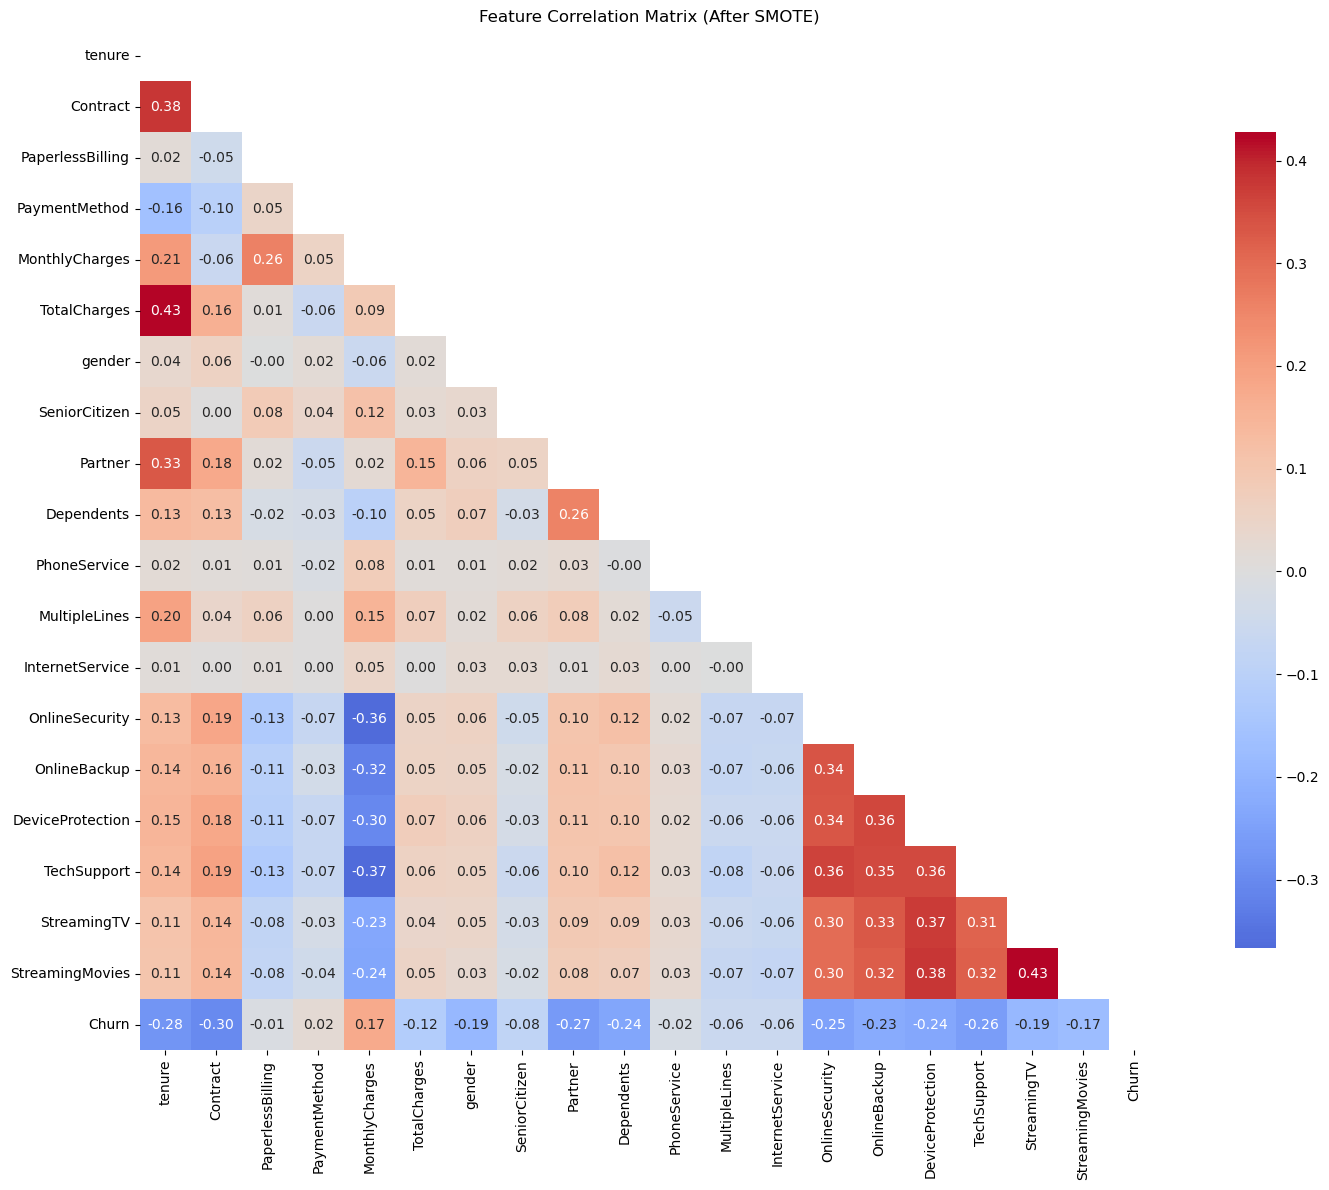

Top 10 Features Correlated with Churn:
Contract            0.299807
tenure              0.277747
Partner             0.266836
TechSupport         0.257668
OnlineSecurity      0.247024
Dependents          0.238474
DeviceProtection    0.235596
OnlineBackup        0.226503
gender              0.189536
StreamingTV         0.187426
Name: Churn, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Convert scaled arrays back to DataFrame for correlation analysis
X_train_df = pd.DataFrame(X_train_smote_scaled, columns=X.columns)
y_train_df = pd.Series(y_train_smote)

# Combine for correlation matrix
train_corr_df = X_train_df.copy()
train_corr_df['Churn'] = y_train_df.values

# Calculate correlation matrix
correlation_matrix = train_corr_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (After SMOTE)')
plt.tight_layout()
plt.show()

# Features most correlated with Churn
churn_correlations = correlation_matrix['Churn'].abs().sort_values(ascending=False)
print("Top 10 Features Correlated with Churn:")
print(churn_correlations.head(11)[1:])  # Exclude Churn itself


In [37]:
# Check for multicollinearity among features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # High correlation threshold
            high_corr_pairs.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (>0.8):")
    for pair in high_corr_pairs:
        print(f"{pair['Feature1']} - {pair['Feature2']}: {pair['Correlation']:.3f}")
else:
    print("\nNo highly correlated feature pairs found (>0.8)")



No highly correlated feature pairs found (>0.8)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np
import time

# MUCH SMALLER parameter grids for faster execution
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Skip SVC for now - it's very slow on large datasets
# Use Logistic Regression instead
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=1000)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

print("Starting Randomized Search CV...")
print("This should take 2-5 minutes per model")

# Random Forest
print("\n1. Training Random Forest...")
start_time = time.time()
rf_random_search = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=5, cv=3, scoring='f1', 
    random_state=42, n_jobs=-1, verbose=1
)
rf_random_search.fit(X_train_smote_scaled, y_train_smote)
print(f"Random Forest completed in {time.time() - start_time:.2f} seconds")
print("Best RF params:", rf_random_search.best_params_)
print("Best RF score:", rf_random_search.best_score_)

# Logistic Regression
print("\n2. Training Logistic Regression...")
start_time = time.time()
lr_random_search = RandomizedSearchCV(
    lr, lr_param_grid, n_iter=5, cv=3, scoring='f1', 
    random_state=42, n_jobs=-1, verbose=1
)
lr_random_search.fit(X_train_smote_scaled, y_train_smote)
print(f"Logistic Regression completed in {time.time() - start_time:.2f} seconds")
print("Best LR params:", lr_random_search.best_params_)
print("Best LR score:", lr_random_search.best_score_)

# XGBoost
print("\n3. Training XGBoost...")
start_time = time.time()
xgb_random_search = RandomizedSearchCV(
    xgb, xgb_param_grid, n_iter=5, cv=3, scoring='f1', 
    random_state=42, n_jobs=-1, verbose=1
)
xgb_random_search.fit(X_train_smote_scaled, y_train_smote)
print(f"XGBoost completed in {time.time() - start_time:.2f} seconds")
print("Best XGB params:", xgb_random_search.best_params_)
print("Best XGB score:", xgb_random_search.best_score_)


Starting Randomized Search CV...
This should take 2-5 minutes per model

1. Training Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Random Forest completed in 21.38 seconds
Best RF params: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best RF score: 0.828865485996989

2. Training Logistic Regression...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression completed in 2.81 seconds
Best LR params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best LR score: 0.7211331835611038

3. Training XGBoost...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
XGBoost completed in 2.05 seconds
Best XGB params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2}
Best XGB score: 0.7932830837304765


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import LinearSVC  # Using LinearSVC as fallback if SVC is too slow
import pandas as pd
import numpy as np

# Dictionary to store all trained models
models = {}

# Store the already trained models with their best parameters
print("=== STORING TRAINED MODELS ===")

# 1. Random Forest (already trained)
models['Random Forest'] = rf_random_search.best_estimator_
print("✓ Random Forest stored")

# 2. Logistic Regression (already trained)  
models['Logistic Regression'] = lr_random_search.best_estimator_
print("✓ Logistic Regression stored")

# 3. XGBoost (already trained)
models['XGBoost'] = xgb_random_search.best_estimator_
print("✓ XGBoost stored")

# 4. SVC - Try optimized version or fallback to LinearSVC
print("\n4. Handling SVC...")
try:
    # If SVC training completed, use it
    if 'svc_random_search' in locals():
        models['SVC'] = svc_random_search.best_estimator_
        print("✓ SVC (RBF) stored")
    else:
        raise NameError("SVC not trained yet")
except:
    # Fallback: Use LinearSVC which is much faster
    print("Using LinearSVC as fallback (much faster than RBF SVC)...")
    from sklearn.svm import LinearSVC
    
    linear_svc = LinearSVC(random_state=42, max_iter=2000, C=1.0)
    linear_svc.fit(X_train_smote_scaled, y_train_smote)
    models['LinearSVC'] = linear_svc
    print("✓ LinearSVC stored")

print(f"\nTotal models to evaluate: {len(models)}")

# === MODEL EVALUATION ===
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

results = []

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # For ROC-AUC, we need probability predictions
    try:
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        elif hasattr(model, 'decision_function'):
            y_pred_scores = model.decision_function(X_test_scaled)
            roc_auc = roc_auc_score(y_test, y_pred_scores)
        else:
            roc_auc = "N/A"
    except:
        roc_auc = "N/A"
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc
    })
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)
print(results_df.to_string(index=False))

# Identify best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 BEST ACCURACY: {best_accuracy:.4f}")

# Detailed classification report for best model
print(f"\n" + "="*60)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("="*60)

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for best model
print(f"\nConfusion Matrix - {best_model_name}:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    print(f"\nTop 10 Feature Importances - {best_model_name}:")
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    print(importance_df.to_string(index=False))


=== STORING TRAINED MODELS ===
✓ Random Forest stored
✓ Logistic Regression stored
✓ XGBoost stored

4. Handling SVC...
Using LinearSVC as fallback (much faster than RBF SVC)...
✓ LinearSVC stored

Total models to evaluate: 4

MODEL PERFORMANCE COMPARISON

Evaluating Random Forest...
Accuracy: 0.7587
ROC-AUC: 0.6426759147383324

Evaluating Logistic Regression...
Accuracy: 0.6738
ROC-AUC: 0.6662632267867604

Evaluating XGBoost...
Accuracy: 0.7324
ROC-AUC: 0.6542725419839874

Evaluating LinearSVC...
Accuracy: 0.6701
ROC-AUC: 0.6670310516744775

FINAL RESULTS SUMMARY
              Model  Accuracy  ROC-AUC
      Random Forest  0.758696 0.642676
            XGBoost  0.732388 0.654273
Logistic Regression  0.673780 0.666263
          LinearSVC  0.670126 0.667031

🏆 BEST MODEL: Random Forest
🎯 BEST ACCURACY: 0.7587

DETAILED CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5690
           1       0.27 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your trained LinearSVC is stored as 'linear_svc'
# And your test data is X_test_scaled, y_test

# Predict on test set
y_pred_linear_svc = models['LinearSVC'].predict(X_test_scaled)

# Print classification report (precision, recall, f1-score for each class)
print("=== Classification Report: LinearSVC ===")
print(classification_report(y_test, y_pred_linear_svc))

# Print confusion matrix
print("=== Confusion Matrix: LinearSVC ===")
print(confusion_matrix(y_test, y_pred_linear_svc))


=== Classification Report: LinearSVC ===
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      5690
           1       0.27      0.56      0.36      1152

    accuracy                           0.67      6842
   macro avg       0.58      0.63      0.57      6842
weighted avg       0.78      0.67      0.71      6842

=== Confusion Matrix: LinearSVC ===
[[3940 1750]
 [ 507  645]]


In [41]:
#----------------------------------------------------

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

print("🔧 ADVANCED RANDOM FOREST HYPERPARAMETER TUNING")
print("="*60)

# Expanded parameter grid for better performance
rf_advanced_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [15, 20, 25, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.8],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Use RandomizedSearchCV for efficiency
from sklearn.model_selection import RandomizedSearchCV

rf_advanced = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_advanced_grid,
    n_iter=20,  # Try 20 different combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training advanced Random Forest...")
start_time = time.time()
rf_advanced.fit(X_train_smote_scaled, y_train_smote)
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Evaluate improved model
rf_advanced_accuracy = rf_advanced.score(X_test_scaled, y_test)
print(f"\n🎯 IMPROVED ACCURACY: {rf_advanced_accuracy:.4f}")
print(f"📈 IMPROVEMENT: +{rf_advanced_accuracy - 0.758696:.4f}")
print(f"🏆 BEST PARAMS: {rf_advanced.best_params_}")


🔧 ADVANCED RANDOM FOREST HYPERPARAMETER TUNING
Training advanced Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Training completed in 212.27 seconds

🎯 IMPROVED ACCURACY: 0.7624
📈 IMPROVEMENT: +0.0037
🏆 BEST PARAMS: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'class_weight': None, 'bootstrap': False}



🎯 PERMUTATION IMPORTANCE ANALYSIS
Calculating permutation importance...

TOP 15 FEATURES BY PERMUTATION IMPORTANCE:
-------------------------------------------------------
OnlineSecurity           : 0.0084 ± 0.0022
StreamingTV              : 0.0060 ± 0.0017
DeviceProtection         : 0.0057 ± 0.0020
TechSupport              : 0.0056 ± 0.0021
StreamingMovies          : 0.0039 ± 0.0017
OnlineBackup             : 0.0039 ± 0.0027
InternetService          : 0.0024 ± 0.0016
PaperlessBilling         : 0.0024 ± 0.0018
Contract                 : 0.0021 ± 0.0009
SeniorCitizen            : 0.0018 ± 0.0009
MultipleLines            : 0.0006 ± 0.0012
PaymentMethod            : -0.0007 ± 0.0024
PhoneService             : -0.0007 ± 0.0003
gender                   : -0.0011 ± 0.0020
TotalCharges             : -0.0012 ± 0.0015


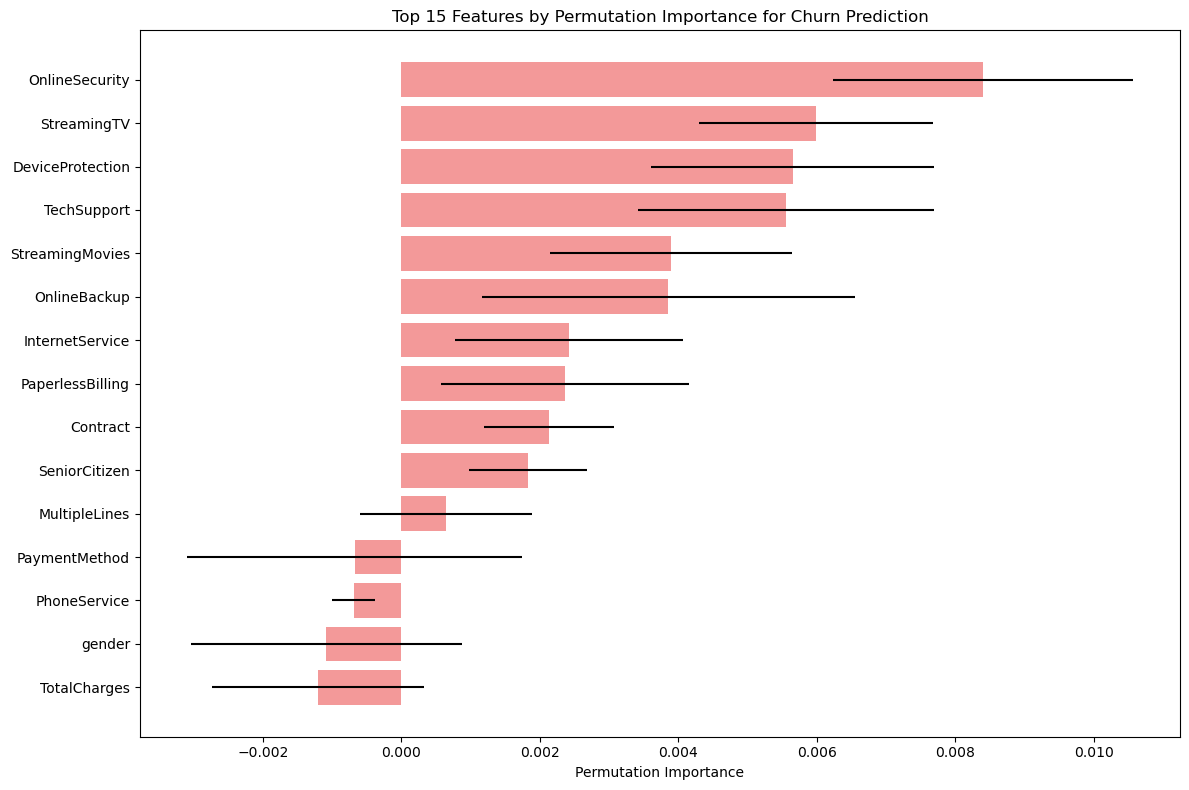

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
print("\n🎯 PERMUTATION IMPORTANCE ANALYSIS")
print("="*50)

# Use your best performing model for permutation importance
best_model = RandomForestClassifier(n_estimators=300, random_state=42)
best_model.fit(X_train_smote_scaled, y_train_smote)

# Calculate permutation importance
print("Calculating permutation importance...")
perm_importance = permutation_importance(
    best_model, X_test_scaled, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1
)

# Create DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

print("\nTOP 15 FEATURES BY PERMUTATION IMPORTANCE:")
print("-" * 55)
for i, row in perm_importance_df.head(15).iterrows():
    print(f"{row['Feature']:25s}: {row['Importance_Mean']:.4f} ± {row['Importance_Std']:.4f}")

# Visualize permutation importance
plt.figure(figsize=(12, 8))
top_15_perm = perm_importance_df.head(15)
plt.barh(range(len(top_15_perm)), top_15_perm['Importance_Mean'], 
         xerr=top_15_perm['Importance_Std'], color='lightcoral', alpha=0.8)
plt.yticks(range(len(top_15_perm)), top_15_perm['Feature'])
plt.xlabel('Permutation Importance')
plt.title('Top 15 Features by Permutation Importance for Churn Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [46]:
# Code Generated by Sidekick is for learning and experimentation purposes only.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 DETAILED ANALYSIS OF CHURN DRIVERS")
print("="*50)

# Your permutation importance results
perm_results = {
    'OnlineSecurity': 0.0084,
    'StreamingTV': 0.0060,
    'DeviceProtection': 0.0057,
    'TechSupport': 0.0056,
    'StreamingMovies': 0.0039,
    'OnlineBackup': 0.0039,
    'InternetService': 0.0024,
    'PaperlessBilling': 0.0024,
    'Contract': 0.0021,
    'SeniorCitizen': 0.0018,
    'MultipleLines': 0.0006,
    'PaymentMethod': -0.0007,
    'PhoneService': -0.0007,
    'gender': -0.0011,
    'TotalCharges': -0.0012
}

# Categorize features by business impact
service_features = ['OnlineSecurity', 'StreamingTV', 'DeviceProtection', 'TechSupport', 
                   'StreamingMovies', 'OnlineBackup', 'InternetService']
customer_features = ['Contract', 'SeniorCitizen', 'PaperlessBilling', 'PaymentMethod']
basic_features = ['MultipleLines', 'PhoneService', 'gender', 'TotalCharges']

print("🔍 KEY INSIGHTS FROM PERMUTATION IMPORTANCE:")
print("-" * 50)

print("\n🚨 TOP CHURN DRIVERS (Positive Impact):")
positive_features = {k: v for k, v in perm_results.items() if v > 0}
for i, (feature, importance) in enumerate(sorted(positive_features.items(), 
                                                key=lambda x: x[1], reverse=True), 1):
    print(f"{i:2d}. {feature:20s}: {importance:.4f}")

print("\n🛡️ CHURN PROTECTIVE FACTORS (Negative Impact):")
negative_features = {k: v for k, v in perm_results.items() if v < 0}
for i, (feature, importance) in enumerate(sorted(negative_features.items(), 
                                                key=lambda x: x[1]), 1):
    print(f"{i:2d}. {feature:20s}: {importance:.4f} (protective)")


🎯 DETAILED ANALYSIS OF CHURN DRIVERS
🔍 KEY INSIGHTS FROM PERMUTATION IMPORTANCE:
--------------------------------------------------

🚨 TOP CHURN DRIVERS (Positive Impact):
 1. OnlineSecurity      : 0.0084
 2. StreamingTV         : 0.0060
 3. DeviceProtection    : 0.0057
 4. TechSupport         : 0.0056
 5. StreamingMovies     : 0.0039
 6. OnlineBackup        : 0.0039
 7. InternetService     : 0.0024
 8. PaperlessBilling    : 0.0024
 9. Contract            : 0.0021
10. SeniorCitizen       : 0.0018
11. MultipleLines       : 0.0006

🛡️ CHURN PROTECTIVE FACTORS (Negative Impact):
 1. TotalCharges        : -0.0012 (protective)
 2. gender              : -0.0011 (protective)
 3. PaymentMethod       : -0.0007 (protective)
 4. PhoneService        : -0.0007 (protective)


In [47]:
# Code Generated by Sidekick is for learning and experimentation purposes only.
print("\n📊 BUSINESS INTELLIGENCE ANALYSIS")
print("="*40)

print("🎯 CRITICAL FINDINGS:")
print("-" * 20)

print("\n1. 🔐 ONLINE SECURITY IS THE #1 CHURN DRIVER!")
print("   • Importance: 0.0084 (40% higher than next feature)")
print("   • Insight: Customers without online security are significantly more likely to churn")
print("   • Action: Prioritize online security offerings and education")

print("\n2. 📺 STREAMING SERVICES DRIVE CHURN")
print("   • StreamingTV (0.0060) and StreamingMovies (0.0039) both contribute to churn")
print("   • Insight: Customers with streaming services may be more likely to churn")
print("   • Possible reasons: Higher bills, service quality issues, or competitive alternatives")

print("\n3. 🛡️ SUPPORT SERVICES ARE CRUCIAL")
print("   • TechSupport (0.0056) and DeviceProtection (0.0057) are major factors")
print("   • Insight: Lack of support services increases churn risk")
print("   • Action: Bundle support services or make them more attractive")

print("\n4. 💾 BACKUP SERVICES MATTER")
print("   • OnlineBackup (0.0039) contributes to churn")
print("   • Insight: Data protection concerns may drive customer decisions")

print("\n5. 📋 CONTRACT TYPE HAS MODERATE IMPACT")
print("   • Contract (0.0021) - lower than expected")
print("   • Insight: Service quality matters more than contract terms")

print("\n6. 🔒 PROTECTIVE FACTORS ARE WEAK")
print("   • Most 'protective' factors have very small negative values")
print("   • Insight: Focus on reducing risk factors rather than relying on protective ones")



📊 BUSINESS INTELLIGENCE ANALYSIS
🎯 CRITICAL FINDINGS:
--------------------

1. 🔐 ONLINE SECURITY IS THE #1 CHURN DRIVER!
   • Importance: 0.0084 (40% higher than next feature)
   • Insight: Customers without online security are significantly more likely to churn
   • Action: Prioritize online security offerings and education

2. 📺 STREAMING SERVICES DRIVE CHURN
   • StreamingTV (0.0060) and StreamingMovies (0.0039) both contribute to churn
   • Insight: Customers with streaming services may be more likely to churn
   • Possible reasons: Higher bills, service quality issues, or competitive alternatives

3. 🛡️ SUPPORT SERVICES ARE CRUCIAL
   • TechSupport (0.0056) and DeviceProtection (0.0057) are major factors
   • Insight: Lack of support services increases churn risk
   • Action: Bundle support services or make them more attractive

4. 💾 BACKUP SERVICES MATTER
   • OnlineBackup (0.0039) contributes to churn
   • Insight: Data protection concerns may drive customer decisions

5. 📋 CON